Data from here: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [ ]:
from bs4 import BeautifulSoup as bsoup
import requests
import pandas as pd
import numpy as np
import string

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library 

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from scipy.stats.mstats import normaltest
from scipy.stats import boxcox

# Obtaining Data from UCI

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-07-23 20:35:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.5’

Bike-Sharing-Datase 100%[===================>] 273.43K  --.-KB/s    in 0.1s    

2021-07-23 20:35:13 (2.42 MB/s) - ‘Bike-Sharing-Dataset.zip.5’ saved [279992/279992]



In [ ]:
from zipfile import ZipFile

with ZipFile('/content/Bike-Sharing-Dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
day=pd.read_csv('day.csv')

In [ ]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour=pd.read_csv('hour.csv')

In [ ]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
fig = go.Figure(data=go.Scatter(x=day['instant'], y=day['cnt'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Rides per Day', xaxis_title='Date', yaxis_title='Rides per Day')
fig.show()

In [ ]:
day[(day.index>715) & (day.index<730)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
716,717,2012-12-17,4,1,12,0,1,1,2,0.393333,0.401500,0.907083,0.098258,212,4373,4585
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.409708,0.666250,0.221404,433,5124,5557
718,719,2012-12-19,4,1,12,0,3,1,1,0.332500,0.342162,0.625417,0.184092,333,4934,5267
719,720,2012-12-20,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128
720,721,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441


In [ ]:
rpm=day[['yr','mnth','cnt']].groupby(['yr','mnth']).sum('cnt')

In [ ]:
rpm.reset_index(inplace=True)

In [ ]:
rpm

,yr,mnth,cnt
0,0,1,38189
1,0,2,48215
2,0,3,64045
3,0,4,94870
4,0,5,135821
5,0,6,143512
6,0,7,141341
7,0,8,136691
8,0,9,127418
9,0,10,123511


In [ ]:
fig = go.Figure(data=go.Scatter(x=rpm.index, y=rpm['cnt'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Rides per Month', xaxis_title='Date', yaxis_title='Rides per Month')
fig.show()

In [ ]:
#instant	dteday	season	yr	mnth	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt

In [ ]:
day2=day[['instant','season','mnth', 'holiday', 'weekday','workingday','weathersit','atemp','hum','windspeed']]
cnt2=day[['cnt']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## First attempt: holiday	weekday	workingday	weathersit	atemp	hum	windspeed

In [ ]:
day3=day[['season', 'mnth','holiday', 'weekday','workingday','weathersit','atemp','hum','windspeed']]
#day3=day[['holiday', 'workingday','weathersit','atemp']]
cnt3=day['cnt']

## Random split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(day3, cnt3, test_size=0.3, 
                                                    random_state=72018)

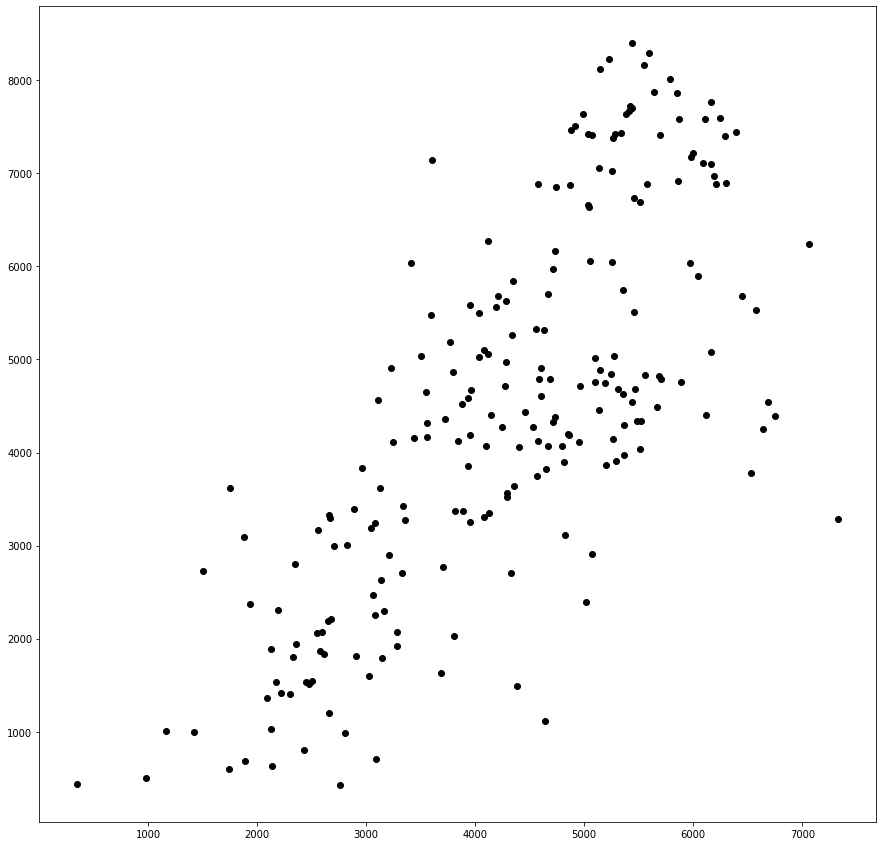

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred=lr.predict(X_test)
r2_score(y_test,ypred)
plt.subplots(figsize=(15,15))    
plt.plot(ypred, y_test, 'o', color='black');

## Create dummy vars

'season', 'mnth','holiday', 'weekday','workingday','weathersit','atemp','hum','windspeed'

In [ ]:
one_hot_encode_cols=['season', 'mnth','holiday', 'weekday','workingday','weathersit']

#one_hot_encode_cols=['holiday','workingday','weathersit']
day4 = pd.get_dummies(day3, columns=one_hot_encode_cols, drop_first=True)
day4

,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0.363625,0.805833,0.160446,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.353739,0.696087,0.248539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.189405,0.437273,0.248309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.212122,0.590435,0.160296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0.229270,0.436957,0.186900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.226642,0.652917,0.350133,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
727,0.255046,0.590000,0.155471,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
728,0.242400,0.752917,0.124383,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
729,0.231700,0.483333,0.350754,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
cnt4=cnt3.copy(deep=True)

In [ ]:
cnt3

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
cnt4

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(day4, cnt4, test_size=0.2, 
                                                    random_state=72018)

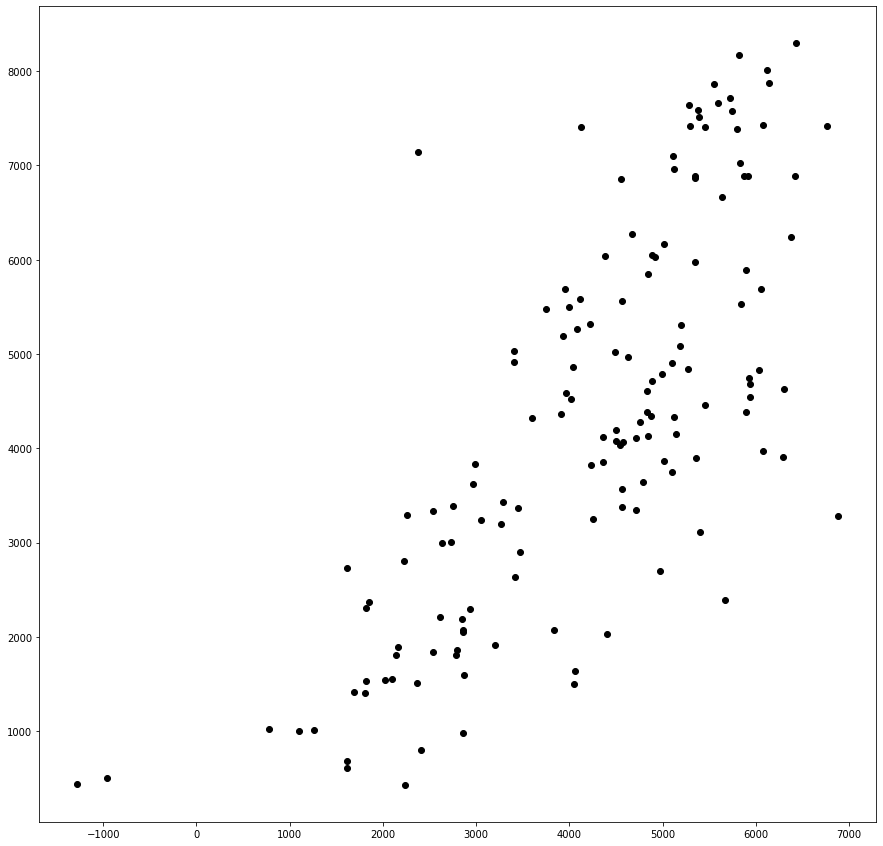

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
ypred=lr.predict(X_test)
r2_score(y_test,ypred)
plt.subplots(figsize=(15,15))    
plt.plot(ypred, y_test, 'o', color='black');

## Decision Tree Regression with GridSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dr = DecisionTreeRegressor().fit(X_train, y_train)

#param_grid = {'max_depth':range(1, (dr.tree_.max_depth+1)*4, 2),
param_grid = {'max_depth':range(80,88),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(1167, 25)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.0,2.494539e+06


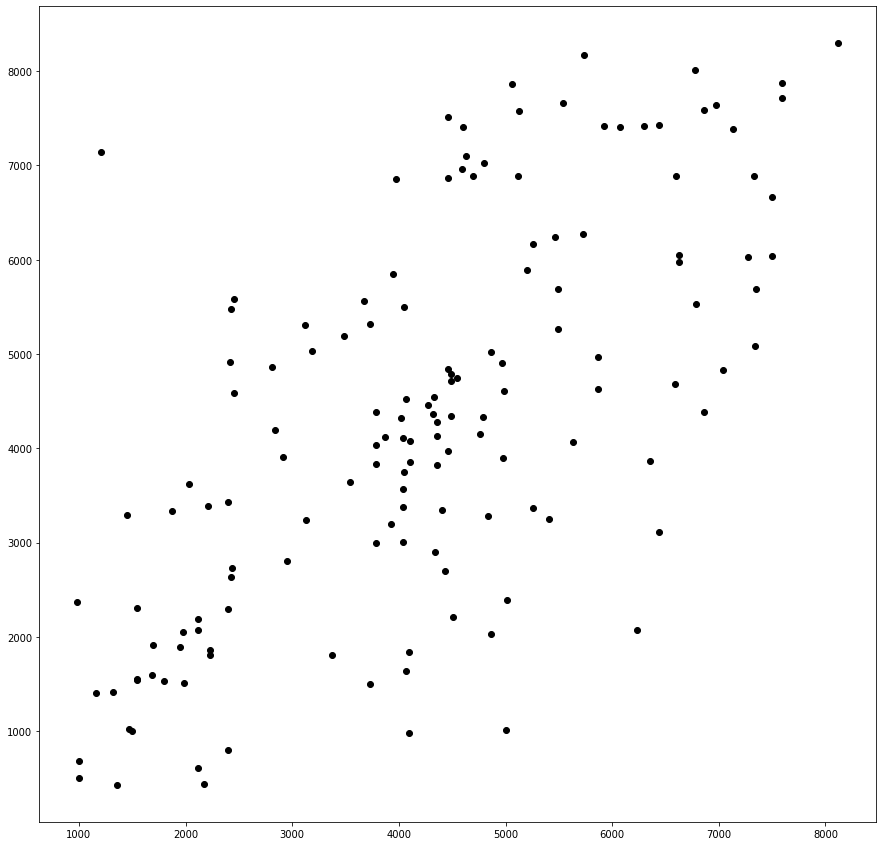

In [ ]:
plt.subplots(figsize=(15,15))    
plt.plot(y_test_pred_gr_sugar, y_test, 'o', color='black');

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dr = DecisionTreeRegressor(max_depth=200).fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_train_pred = dr.predict(X_train)
y_test_pred  = dr.predict(X_test)

train_test_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                                         'test':  mean_squared_error(y_test, y_test_pred)},
                                          name='MSE').to_frame().T

train_test_error

,train,test
MSE,0.0,2.466949e+06


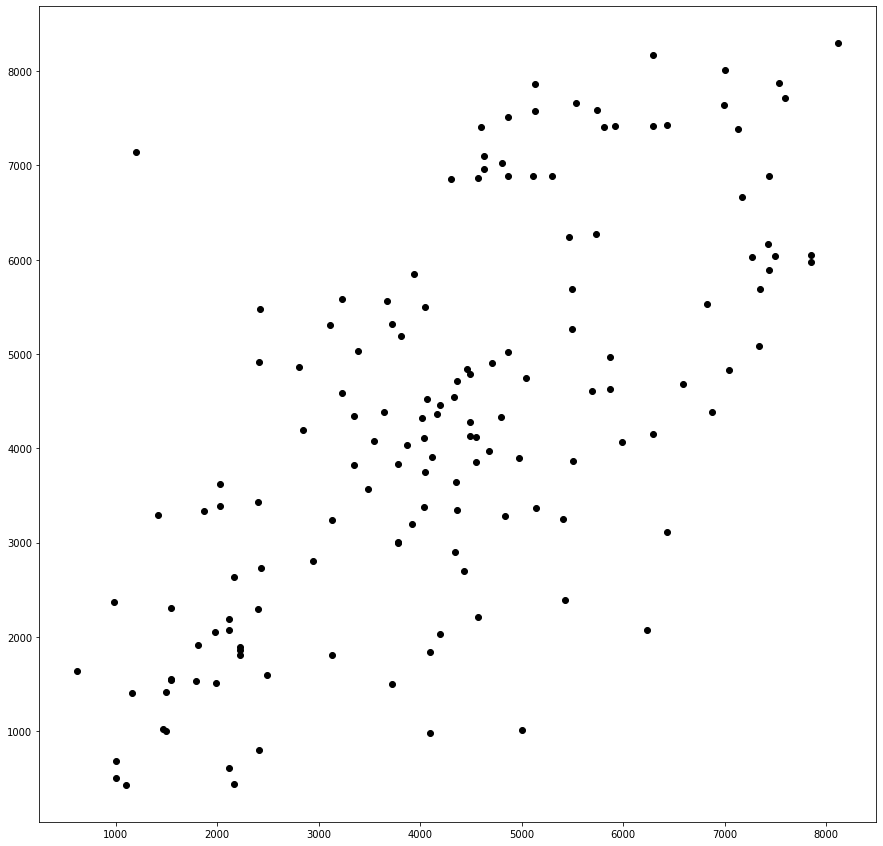

In [ ]:
plt.subplots(figsize=(15,15))    
plt.plot(y_test_pred, y_test, 'o', color='black');

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xg = XGBRegressor(random_state = 0, learning_rate = 0.01, n_estimators =4000)

xg.fit(X_train, y_train)
y_train_pred = xg.predict(X_train)
y_test_pred  = xg.predict(X_test)

train_test_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                                         'test':  mean_squared_error(y_test, y_test_pred)},
                                          name='MSE').to_frame().T

train_test_error

[20:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train,test
MSE,248281.760944,1.996322e+06


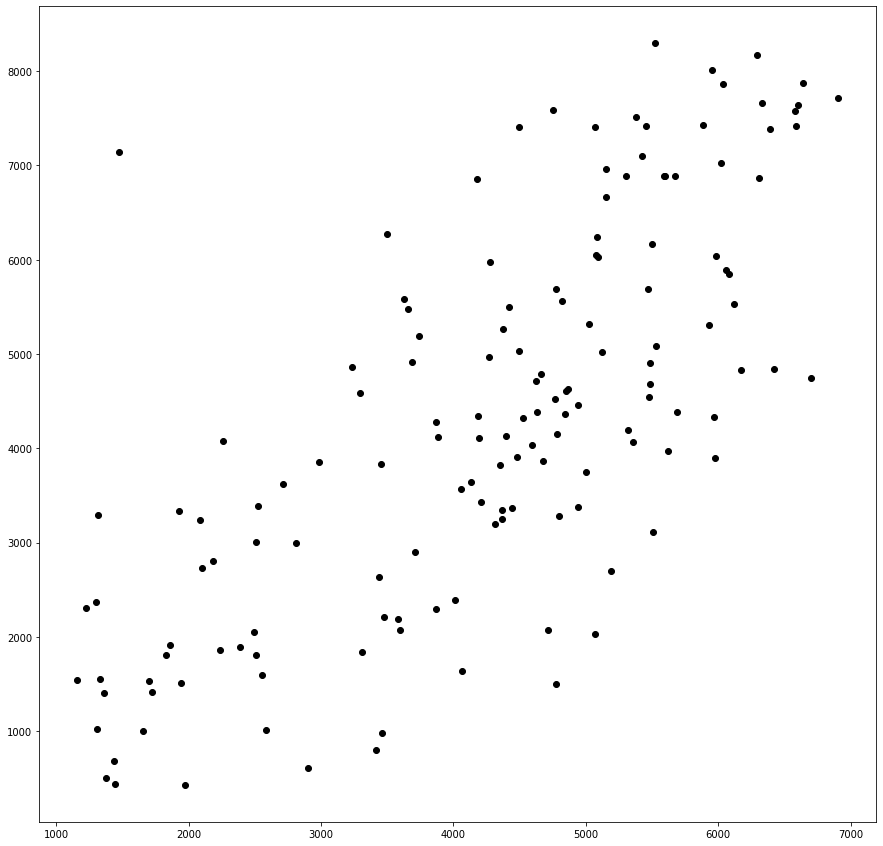

In [ ]:
plt.subplots(figsize=(15,15))    
plt.plot(y_test_pred, y_test, 'o', color='black');

In [ ]:
xg.score(X_test,y_test)

0.5308544031554147

# Data from Kaggle

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBM-MachineLearning-ProfessionalCertification/Specialized Models - Time Series and Survival Analysis/myproject/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBM-MachineLearning-ProfessionalCertification/Specialized Models - Time Series and Survival Analysis/myproject/test.csv')


In [ ]:
df_train.datetime = df_train.datetime.apply(pd.to_datetime)
df_train['month'] = df_train.datetime.apply(lambda x: x.month)
df_train['hour'] = df_train.datetime.apply(lambda x: x.hour)
df_train['day'] = df_train.datetime.apply(lambda x: x.day)
df_train['year'] = df_train.datetime.apply(lambda x: x.year)
df_train.drop(['datetime'], 1, inplace = True)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,2011


In [ ]:
df_test.datetime = df_test.datetime.apply(pd.to_datetime)
df_test['month'] = df_test.datetime.apply(lambda x: x.month)
df_test['hour'] = df_test.datetime.apply(lambda x: x.hour)
df_test['day'] = df_test.datetime.apply(lambda x: x.day)
df_test['year'] = df_test.datetime.apply(lambda x: x.year)
df_test.drop(['datetime'], 1, inplace = True)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day,year
0,1,0,1,1,10.66,11.365,56,26.0027,1,0,20,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,20,2011
2,1,0,1,1,10.66,13.635,56,0.0000,1,2,20,2011
3,1,0,1,1,10.66,12.880,56,11.0014,1,3,20,2011
4,1,0,1,1,10.66,12.880,56,11.0014,1,4,20,2011


In [ ]:
X = np.array(df_train.drop(df_train[['casual', 'registered', 'count']], 1))
y = np.array(df_train['count'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
ran_fore = RandomForestRegressor(n_estimators= 4000)
ran_fore.fit(X_train, y_train)

y_test_pred  = ran_fore.predict(X_test)

print('The accuracy of Random Forest Regressor is: ', ran_fore.score(X_test, y_test))

The accuracy of Random Forest Regressor is:  0.9418463865458633


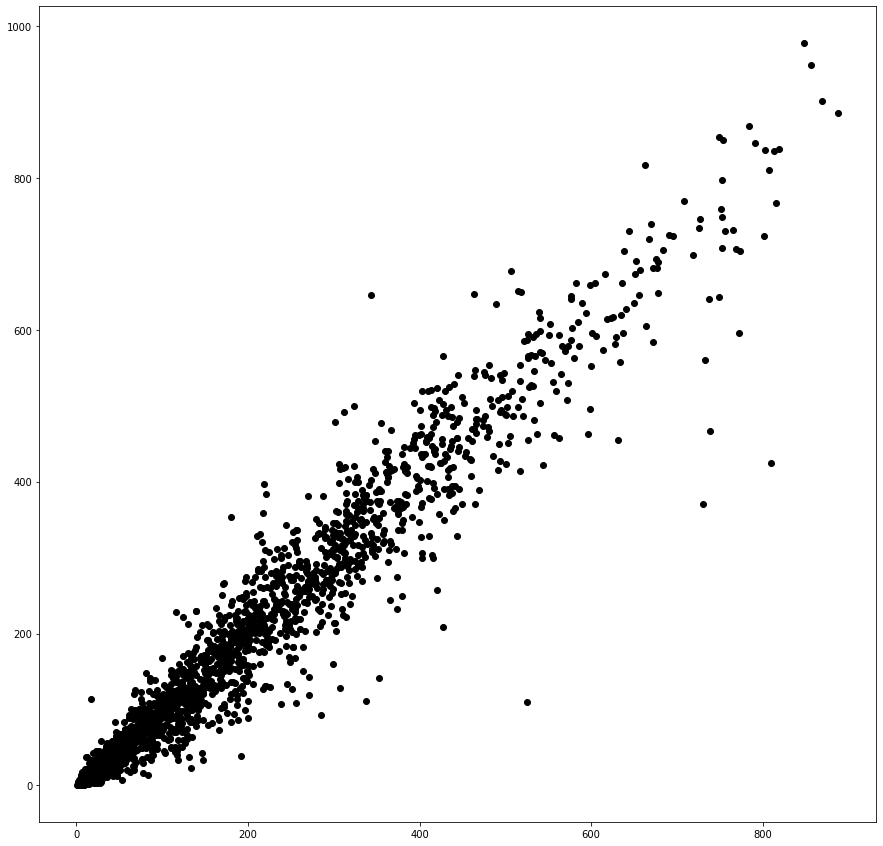

In [ ]:
plt.subplots(figsize=(15,15))    
plt.plot(y_test_pred, y_test, 'o', color='black');

## XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
xg = XGBRegressor(random_state = 0, learning_rate = 0.01, n_estimators =5000)

xg.fit(X_train, y_train)
y_train_pred = xg.predict(X_train)
y_test_pred  = xg.predict(X_test)

train_test_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                                         'test':  mean_squared_error(y_test, y_test_pred)},
                                          name='MSE').to_frame().T

train_test_error

[20:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train,test
MSE,2348.307559,2572.875663


In [ ]:

print('The accuracy of XGBRegressor is: ', xg.score(X_test, y_test))

The accuracy of XGBRegressor is:  0.9200926527536827


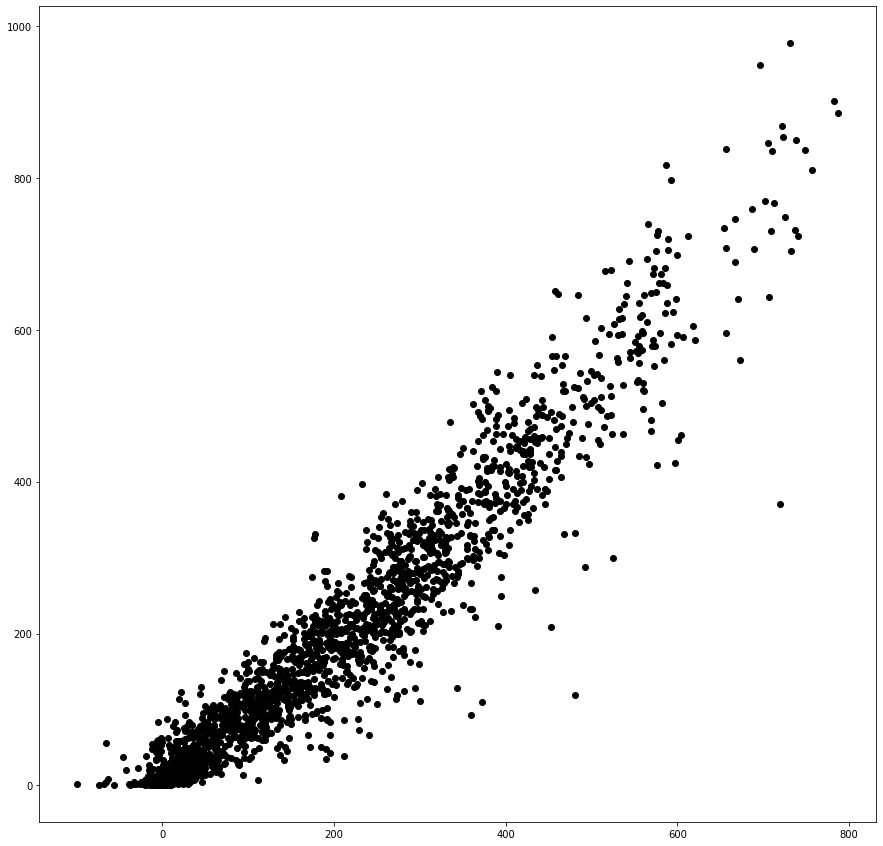

In [ ]:
plt.subplots(figsize=(15,15))    
plt.plot(y_test_pred, y_test, 'o', color='black');

## Plot Monthly

In [ ]:
rpm=df_train[['year','month','count']].groupby(['year','month']).sum('count')
rpm.reset_index(inplace=True)

In [ ]:
fig = go.Figure(data=go.Scatter(x=rpm.index, y=rpm['count'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Rides per Month', xaxis_title='Date', yaxis_title='Rides per Month')
fig.show()

## Plot Daily

In [ ]:
rpd=df_train[['year','month','day','count']].groupby(['year','month','day']).sum('count')
rpd.reset_index(inplace=True)

In [ ]:
fig = go.Figure(data=go.Scatter(x=rpd.index, y=rpd['count'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Rides per Day', xaxis_title='Date', yaxis_title='Rides per Month')
fig.show()

In [ ]:
rpd.head()

,year,month,day,count
0,2011,1,1,985
1,2011,1,2,801
2,2011,1,3,1349
3,2011,1,4,1562
4,2011,1,5,1600


In [ ]:
rpd.tail()

,year,month,day,count
451,2012,12,15,5047
452,2012,12,16,3786
453,2012,12,17,4585
454,2012,12,18,5557
455,2012,12,19,5267
